In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.chdir('../')
os.getcwd()

'C:\\Users\\daman\\Desktop\\blops4'

In [15]:
pl1 = pd.read_csv('data_imports/proleague1.csv')

In [20]:
snd = pl1[pl1['mode'] == 'Search & Destroy'].copy()
resp = pl1[pl1['mode'] != 'Search & Destroy'].copy()

In [21]:
snd['win?'].replace(('W', 'L'), (1,0), inplace=True)
resp['win?'].replace(('W', 'L'), (1,0), inplace=True)

In [38]:
snd_pct = pd.DataFrame(snd.groupby('team')['win?'].mean())
resp_pct = pd.DataFrame(resp.groupby('team')['win?'].mean())
snd_pct.columns = ['snd win pct']
resp_pct.columns = ['resp win pct']

In [53]:
win_pct = pd.concat([snd_pct, resp_pct], axis=1)
win_pct['snd - resp'] = win_pct['snd win pct']-win_pct['resp win pct']
win_pct = win_pct.sort_values('snd - resp', ascending=False)
win_pct

,snd win pct,resp win pct,snd - resp
team,,,
Excelerate,0.600000,0.071429,0.528571
Gen.G,1.000000,0.476190,0.523810
Reciprocity,0.700000,0.200000,0.500000
eUnited,0.700000,0.526316,0.173684
Denial,0.375000,0.350000,0.025000
Red Reserve,0.625000,0.611111,0.013889
Splyce,0.555556,0.550000,0.005556
ExcelerateGG,0.500000,0.500000,0.000000
Heretics,0.555556,0.578947,-0.023392


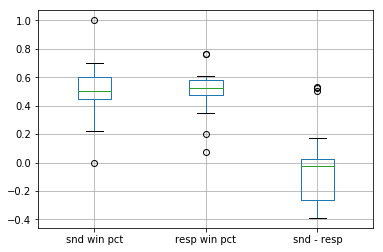

In [50]:
win_pct.boxplot()